In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import numpy as np


In [2]:
df_pubs = pd.read_pickle("pubs_class_distribution.pkl")

In [3]:
df_db_class = pd.read_pickle("db_sub_and_class_count.pkl")

In [4]:
df_class_distr = pd.read_pickle("class_distribution.pkl")

In [5]:
df_doctype_distr = pd.read_pickle('pubs_class_doctype_distribution.pkl')

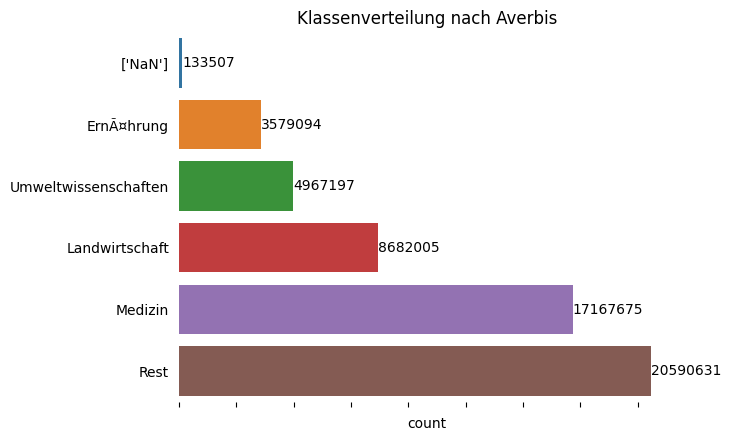

In [5]:
titles= "Klassenverteilung nach Averbis"
fig1= sns.barplot(data=df_class_distr, x="count", y="class")
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.bar_label(fig1.containers[0], fmt = '%d')
plt.title(titles)
sns.despine(left=True, bottom=True)
plt.savefig(titles+".png")
plt.show(fig1)

In [16]:
df_db_class = df_db_class.astype({'database':'string'})
df_db_class = df_db_class.astype({'class':'string'})
df_db_class = df_db_class.astype({'subdatabase':'string'})
df_db_class["database"] = df_db_class['database'].str.replace('[^\w\s]','',regex = True)
df_db_class["subdatabase"] = df_db_class['subdatabase'].str.replace('[^\w\s]','',regex = True )

In [17]:
df_db_sum = df_db_class.groupby('database').sum()

C:\Users\Keks\AppData\Local\Temp\ipykernel_8952\831376311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_db_sum = df_db_class.groupby('database').sum()


In [18]:
df_db_sum = df_db_sum.reset_index()

In [19]:
df_db_sum=df_db_sum.sort_values("count", ascending=False)

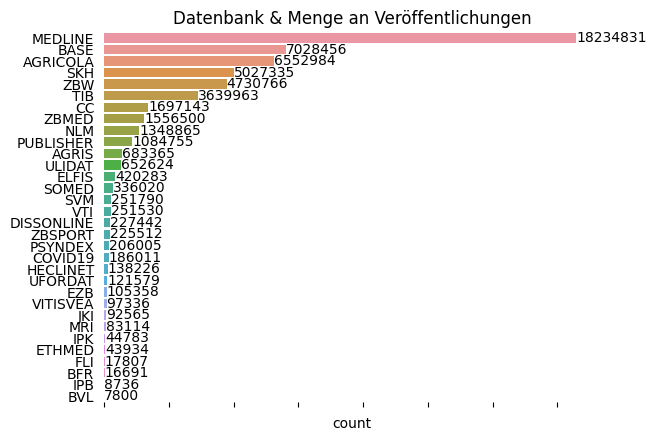

In [10]:
titles= "Datenbank & Menge an Veröffentlichungen"
fig1= sns.barplot(data=df_db_sum, x="count", y="database")
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.bar_label(fig1.containers[0], fmt = '%d')
plt.title(titles)
sns.despine(left=True, bottom=True)
plt.savefig(titles+".png")
plt.show(fig1)

In [15]:
df_db_class_sum = df_db_class.groupby(['database', 'class'])["count"].apply(lambda x : x.astype(int).sum())
df_db_class_sum= df_db_class_sum.reset_index()
df_db_sum=df_db_sum.sort_values("count", ascending=False)

In [23]:
titles= "Datenbank & Menge an Veröffentlichungen"
fig1= px.histogram(df_db_class_sum, x="class",y="count",color="database", text_auto='.2s')

fig1.show()

In [32]:
df_pubs = pd.read_pickle("pubs_class_distribution.pkl")
df_pubs = df_pubs[df_pubs['count'] > 60000]
df_pubs = df_pubs.astype({'publisher':'string'})
df_pubs = df_pubs.astype({'class':'string'})
df_pubs = df_pubs.astype({'count':'int'})
df_pubs["publisher"] = df_pubs['publisher'].str.replace('[^\w\s]','',regex = True)
df_pubs_n=df_pubs[df_pubs['publisher']=='']
df_pubs['publisher'].replace('', np.nan, inplace=True)
df_pubs_y = df_pubs[df_pubs['publisher'].notna()]

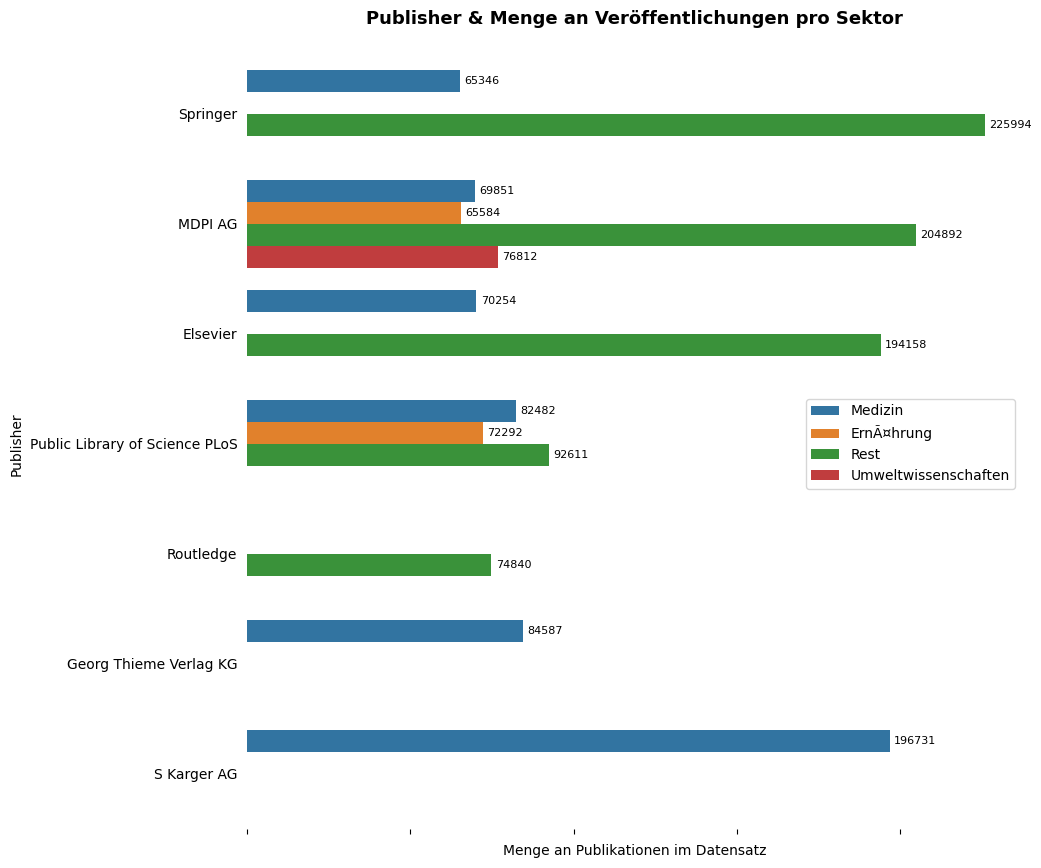

In [36]:
titles ="Publisher & Menge an Veröffentlichungen pro Sektor"
plt.figure(figsize=(10,10))
fig1= sns.barplot(data=df_pubs_y, x="count", y="publisher",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)


fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
#plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
#plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
fig1.set(xlabel="Menge an Publikationen im Datensatz",
       ylabel="Publisher")
fig1.text(x=0.5, y=1.04, s='Publisher & Menge an Veröffentlichungen pro Sektor',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=fig1.transAxes)
plt.savefig(titles+"_60k.png")
plt.show(fig1)

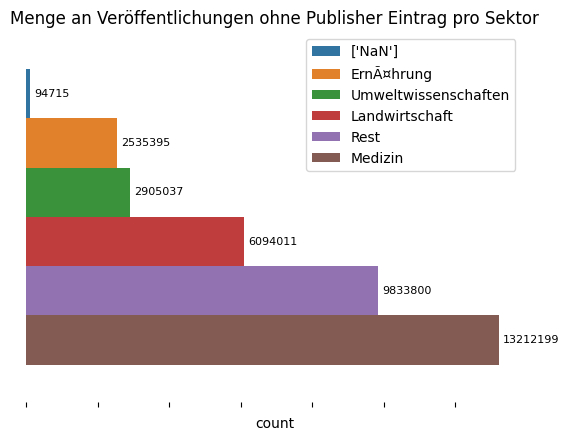

In [112]:
titles= "Menge an Veröffentlichungen ohne Publisher Eintrag pro Sektor"
fig1= sns.barplot(data=df_pubs_n, x="count", y="publisher",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.title(titles)
plt.savefig(titles+".png")
plt.show(fig1)

In [8]:
titles= "----"
fig1= sns.barplot(data=df_doctype_distr, x="count", y="doctype",hue="class", width = 0.8)
sns.despine(left=True, bottom=True)
fig1.set(xticklabels=[])
fig1.set(ylabel=None)
fig1.set(ylabel=None)
fig1.tick_params(left=False)
plt.legend(loc='best', fontsize=10)
plt.bar_label(fig1.containers[0], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[1], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[2], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[3], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[4], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.bar_label(fig1.containers[5], fmt = '%d', fontsize=8, rotation=0, padding=3)
plt.title(titles)
plt.savefig(titles+".png")
plt.show(fig1)

TypeError: unhashable type: 'list'

In [12]:
df_sort = df_doctype_distr.sort_values(by=["count"],ascending = False)

In [13]:
df_sort

,count,doctype,publisher,class
2444786,9519050,[ARTIKEL],[],Medizin
2444785,4628705,[ARTIKEL],[],Rest
2444784,3870131,[ARTIKEL],[],Landwirtschaft
2444783,1577947,[ARTIKEL],[],Umweltwissenschaften
2444782,1563752,[ARTIKEL],[],ErnÃ¤hrung
...,...,...,...,...
814928,1,[MONO],"[Lee Kuan Yew Centre for Innovative Cities, Si...",Umweltwissenschaften
814929,1,[MONO],"[Lee Kim Heng, Act. Gov. Pr]",Rest
814930,1,[MONO],"[Lee Furman, inc]",Rest
814931,1,[MONO],[Lee Furman],Rest
